# IMPORTS

In [1]:
# BASIC IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# MODELLING
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# MODEL SELECETION
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import ( r2_score, mean_absolute_error, mean_squared_error,
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, precision_score, recall_score, f1_score, log_loss,
    matthews_corrcoef, cohen_kappa_score, accuracy_score, roc_curve, auc

)

In [2]:
df = pd.read_csv('C:/Users/kabee/OneDrive/Desktop/DS_PROJECT/notebook/data/Obesity Estimation Cleaned.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,FamOverweightHist,FreqHighCalFood,FreqVeg,MainMeals,FoodBtwMeals,Smoke,WaterIntake,CalorieMonitor,FreqPhyAct,TechUse,AlcoholConsump,Transport,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.34


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FamOverweightHist',
       'FreqHighCalFood', 'FreqVeg', 'MainMeals', 'FoodBtwMeals', 'Smoke',
       'WaterIntake', 'CalorieMonitor', 'FreqPhyAct', 'TechUse',
       'AlcoholConsump', 'Transport', 'Obesity', 'BMI'],
      dtype='object')

In [5]:
df.shape

(2087, 18)

# MetaData

In [6]:
metadata = {
    "Gender"           :"Gender",
    "Age"              :"Age",
    "Height"           :"Height",
    "Weight"           :"Weight",
    "FamOverweightHist":"Has a family member suffered or suffers from overweight?",
    "FreqHighCalFood"  :"Do you eat high caloric food frequently?",
    "FreqVeg"          :"Do you usually eat vegetables in your meals?",
    "MainMeals"        :"How many main meals do you have daily?",
    "FoodBtwMeals"     :"Do you eat any food between meals?",
    "Smoke"            :"Do you smoke?",
    "WaterIntake"      :"How much water do you drink daily?",
    "CalorieMonitor"   :"Do you monitor the calories you eat daily?",
    "FreqPhyAct"       :"How often do you have physical activity?",
    "TechUse"          :"How much time do you use technological devices such as Cell Phone, T.V., computer Etc?",
    "AlcoholConsump"   :"How often do you drink alcohol?",
    "Transport"        :"Which transportation do you usually use?",
    "Obesity"          :"Obesity level",
    "BMI"              :"Body Mass Index"
}


metadata


{'Gender': 'Gender',
 'Age': 'Age',
 'Height': 'Height',
 'Weight': 'Weight',
 'FamOverweightHist': 'Has a family member suffered or suffers from overweight?',
 'FreqHighCalFood': 'Do you eat high caloric food frequently?',
 'FreqVeg': 'Do you usually eat vegetables in your meals?',
 'MainMeals': 'How many main meals do you have daily?',
 'FoodBtwMeals': 'Do you eat any food between meals?',
 'Smoke': 'Do you smoke?',
 'WaterIntake': 'How much water do you drink daily?',
 'CalorieMonitor': 'Do you monitor the calories you eat daily?',
 'FreqPhyAct': 'How often do you have physical activity?',
 'TechUse': 'How much time do you use technological devices such as Cell Phone, T.V., computer Etc?',
 'AlcoholConsump': 'How often do you drink alcohol?',
 'Transport': 'Which transportation do you usually use?',
 'Obesity': 'Obesity level',
 'BMI': 'Body Mass Index'}

- Types Of Features

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

if len(numeric_features)>len(categorical_features):
    categorical_features.extend([None] * (len(numeric_features) - len(categorical_features)))
elif len(numeric_features)<len(categorical_features):
    numeric_features.extend([None] * (len(categorical_features) - len(numeric_features)))
else:
    features = pd.DataFrame({
    'Numerical': numeric_features,
    'Categorical': categorical_features
    })

features

,Numerical,Categorical
0,Age,Gender
1,Height,FamOverweightHist
2,Weight,FreqHighCalFood
3,FreqVeg,FoodBtwMeals
4,MainMeals,Smoke
5,WaterIntake,CalorieMonitor
6,FreqPhyAct,AlcoholConsump
7,TechUse,Transport
8,BMI,Obesity


- Values of Categorical features

In [8]:
cf_vals = pd.DataFrame({
    'Cat Feature': categorical_features,
    'Values': [df[feature].unique().tolist() for feature in categorical_features]
})
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  

cf_vals

,Cat Feature,Values
0,Gender,"[Female, Male]"
1,FamOverweightHist,"[yes, no]"
2,FreqHighCalFood,"[no, yes]"
3,FoodBtwMeals,"[Sometimes, Frequently, Always, no]"
4,Smoke,"[no, yes]"
5,CalorieMonitor,"[no, yes]"
6,AlcoholConsump,"[no, Sometimes, Frequently, Always]"
7,Transport,"[Public Transportation, Walking, Automobile, Motorbike, Bike]"
8,Obesity,"[Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Insufficient Weight, Obesity Type II, Obesity Type III]"


In [9]:
def get_binary_features(cf_vals):
    binary_feats = []
    for i, row in cf_vals.iterrows():
        if len(row['Values']) == 2:
            binary_feats.append(row['Cat Feature'])
    return binary_feats

In [10]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


- Setting Target Variable

In [11]:
target_variable = 'Obesity'

In [12]:
df.loc[:, target_variable] = df[target_variable].factorize()[0]
X = df.drop(columns=[target_variable])
y = df[target_variable]

- Encoding

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

- Perform the train/test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1669, 17), (418, 17), (1669,), (418,))

In [15]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2


- SUPRESSING SOME WARNINGS

In [16]:
import warnings
import joblib
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", message="Precision is ill-defined and being set to 0.0 in labels with no predicted samples.")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*Could not find the number of physical cores.*")

# REGRESSION

- Defining Regression models

In [17]:
Model_reg = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

In [18]:
model_list = []
r2_list =[]

best_model_reg = None
best_r2_score = -float('inf')

for model_name, model_r in Model_reg.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_r)
    ])
    
    # Training the model
    clf.fit(X_train, y_train)
    
    # Making predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Evaluating Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    if model_test_r2 > best_r2_score:
        best_r2_score = model_test_r2
        best_model_reg = model_name
    
    print(f"--------------{model_name.upper()}-------------\n")
    data = {
        "Dataset": ["Training", "Test"],
        "Root Mean Squared Error": [model_train_rmse, model_test_rmse],
        "Mean Absolute Error": [model_train_mae, model_test_mae],
        "R2 Score": [model_train_r2, model_test_r2]
    }
    
    performance_df = pd.DataFrame(data)
    print(performance_df.T) 
    print("\n")


--------------LINEAR REGRESSION-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  1.325067   1.39051
Mean Absolute Error      1.053749  1.105204
R2 Score                 0.557428  0.516477


--------------LASSO-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  1.789728  1.803835
Mean Absolute Error      1.583399  1.600246
R2 Score                 0.192612  0.186304


--------------RIDGE-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  1.325306  1.387918
Mean Absolute Error      1.055351  1.104485
R2 Score                 0.557268  0.518278


--------------K-NEIGHBORS REGRESSOR-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  0.586548  0.782341
Mean Absolute Error      0.261354  0.3

  File "c:\USERS\KABEE\ONEDRIVE\DESKTOP\DS_PROJECT\VENV\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\USERS\KABEE\ONEDRIVE\DESKTOP\DS_PROJECT\VENV\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\USERS\KABEE\ONEDRIVE\DESKTOP\DS_PROJECT\VENV\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\USERS\KABEE\ONEDRIVE\DESKTOP\DS_PROJECT\VENV\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


--------------RANDOM FOREST REGRESSOR-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  0.090014  0.328261
Mean Absolute Error      0.018394  0.073014
R2 Score                 0.997958  0.973053


--------------XGBREGRESSOR-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  0.005452   0.39565
Mean Absolute Error       0.00319   0.08828
R2 Score                 0.999992  0.960854


--------------CATBOOSTING REGRESSOR-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  0.055402  0.346973
Mean Absolute Error      0.036041  0.115111
R2 Score                 0.999226  0.969893


--------------ADABOOST REGRESSOR-------------

                                0         1
Dataset                  Training      Test
Root Mean Squared Error  0.386643   0.50771
Mean Absolut

In [19]:
print(f"\nBEST REGRESSION MODEL: {best_model_reg} \nR2 SCORE  = {best_r2_score:.4f}")


BEST REGRESSION MODEL: Random Forest Regressor 
R2 SCORE  = 0.9731


# CLASSIFICATION

- Defining Classification models

In [20]:
Model_Class = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(solver='saga') 
}

In [21]:
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

X = df.drop('Obesity', axis=1)
y = df['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Train and evaluate each model

SVM: Accuracy = 0.7464
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        61
           1       0.62      0.53      0.57        55
           2       0.45      0.76      0.56        49
           3       0.91      0.57      0.70        70
           4       0.75      1.00      0.86        59
           5       0.91      0.92      0.91        64
           6       0.94      0.98      0.96        60

    accuracy                           0.75       418
   macro avg       0.76      0.75      0.74       418
weighted avg       0.78      0.75      0.74       418



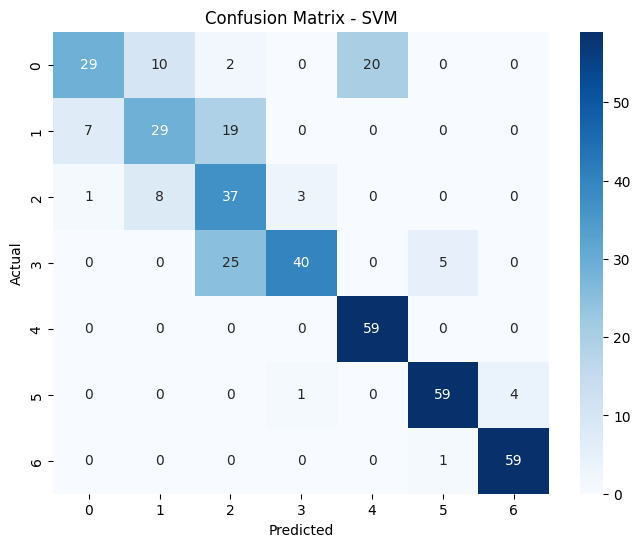



KNN: Accuracy = 0.9474
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        61
           1       0.85      0.95      0.90        55
           2       0.94      1.00      0.97        49
           3       1.00      0.99      0.99        70
           4       0.88      1.00      0.94        59
           5       0.98      0.98      0.98        64
           6       0.98      1.00      0.99        60

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



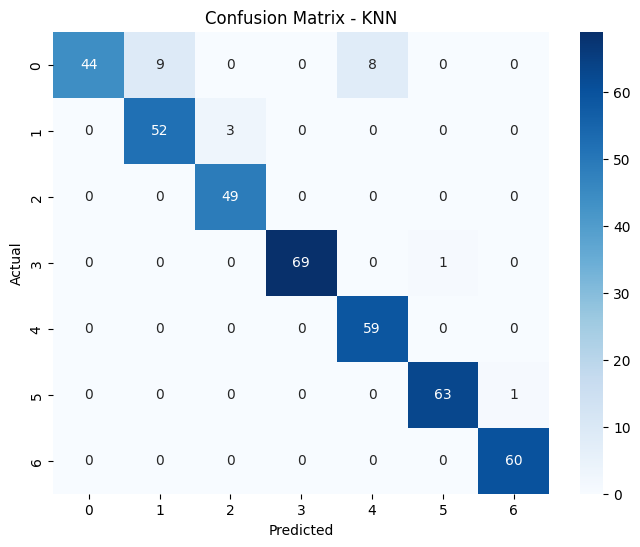



Random Forest: Accuracy = 0.9904
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       1.00      0.96      0.98        55
           2       0.96      1.00      0.98        49
           3       1.00      1.00      1.00        70
           4       0.98      0.98      0.98        59
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        60

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



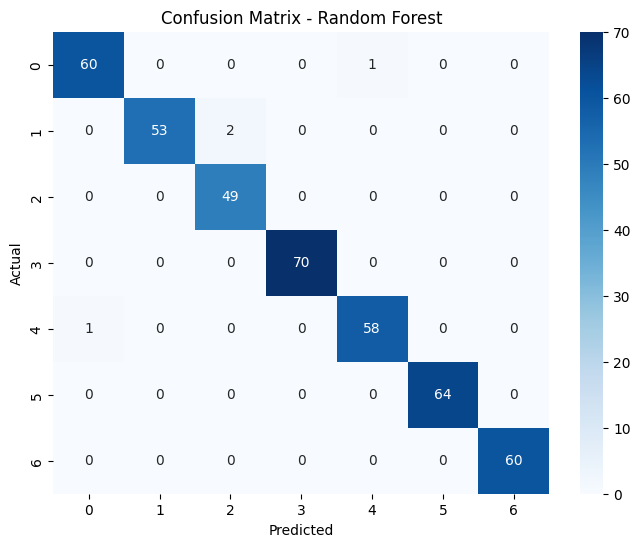



Naive Bayes: Accuracy = 0.8947
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71        61
           1       0.87      0.85      0.86        55
           2       0.82      0.96      0.89        49
           3       1.00      0.89      0.94        70
           4       0.76      0.98      0.86        59
           5       0.94      1.00      0.97        64
           6       1.00      1.00      1.00        60

    accuracy                           0.89       418
   macro avg       0.90      0.90      0.89       418
weighted avg       0.90      0.89      0.89       418



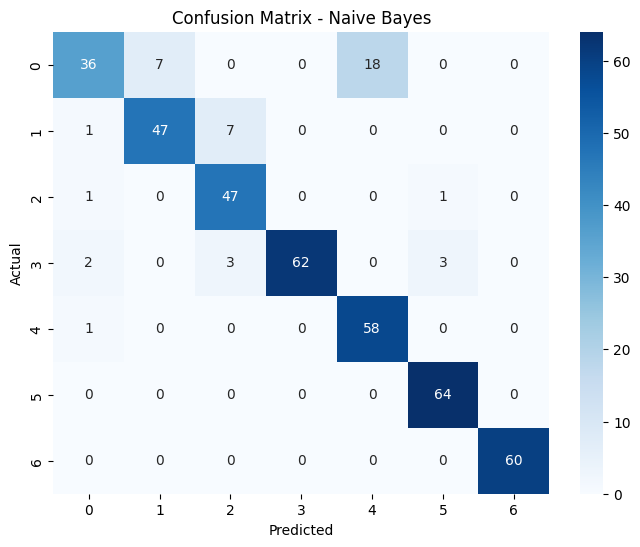



Logistic Regression: Accuracy = 0.6699
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.48      0.54        61
           1       0.62      0.45      0.53        55
           2       0.41      0.47      0.44        49
           3       0.58      0.56      0.57        70
           4       0.82      0.85      0.83        59
           5       0.76      0.84      0.80        64
           6       0.79      1.00      0.88        60

    accuracy                           0.67       418
   macro avg       0.66      0.66      0.66       418
weighted avg       0.66      0.67      0.66       418



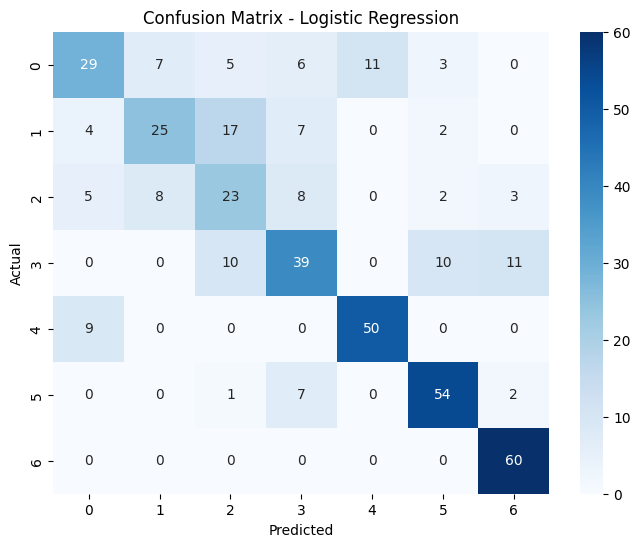

In [22]:
best_model_gen_class = None
best_accuracy_gen_class = 0.0

for name, model_c in Model_Class.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), 
        ('classifier', model_c)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)    
    report = classification_report(y_test, y_pred)

    print(f"{name}: Accuracy = {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("\n")

    if accuracy > best_accuracy_gen_class:
        best_accuracy_gen_class = accuracy
        best_model_gen_class = name



In [23]:
print(f"\nBEST MODEL FOR GENERAL CLASSIFICATION: {best_model_gen_class} \nACCURACY = {best_accuracy_gen_class:.4f}") 


BEST MODEL FOR GENERAL CLASSIFICATION: Random Forest 
ACCURACY = 0.9904


# BINARY CLASSFICATION

In [24]:
binary_features = get_binary_features(cf_vals)
target_variable = 'Obesity'

- Function to classify obesity based on BMI

In [25]:
def classify_obesity(bmi):
    return 1 if bmi >= 25 else 0
    # 1 - obese
    # 0 - not obese

df[target_variable] = df['BMI'].apply(classify_obesity)

- Label Ecoding for Binary Features

In [26]:
label_encoders = {feature: LabelEncoder() for feature in binary_features}

for feature in binary_features:
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [27]:
results = []

best_model = None
best_accuracy = 0.0
best_cm = None
best_pipeline = pipeline  


for name, model_bc in Model_Class.items():
    X = df[binary_features]
    y = df[target_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  
        ('classifier', model_bc)  
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # ACCURACY
    cm = confusion_matrix(y_test, y_pred)      # CONFUSION MATRIX
    roc_auc = roc_auc_score(y_test, y_pred)    # ROC-AUC

    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc,
    })
    
    if accuracy > best_accuracy:
        best_model = name
        best_accuracy = accuracy
        best_cm = cm
        best_pipeline = pipeline


results_df = pd.DataFrame(results)
print("------------------------| RESULT SUMMARY |--------------------------")
results_df

------------------------| RESULT SUMMARY |--------------------------


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,SVM,0.796651,0.809384,0.932432,0.866562,0.699823
1,KNN,0.806220,0.811594,0.945946,0.873635,0.706580
2,Random Forest,0.799043,0.809942,0.935811,0.868339,0.701512
3,Naive Bayes,0.748804,0.821549,0.824324,0.822934,0.694949
4,Logistic Regression,0.787081,0.800000,0.932432,0.861154,0.683429


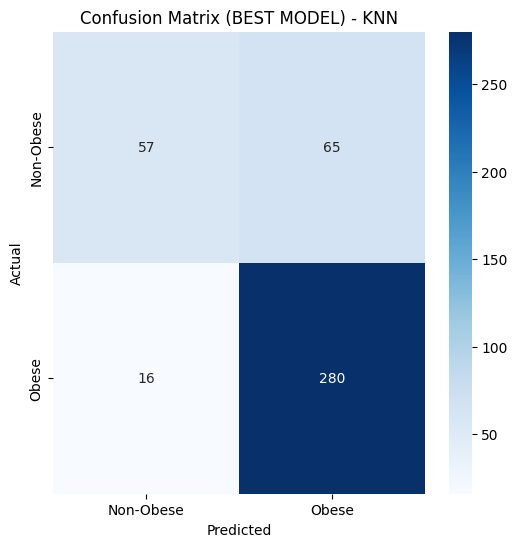

In [28]:
classes=["Non-Obese", "Obese"]

plt.figure(figsize=(6, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BEST MODEL) - ' + best_model)
plt.show()


In [29]:
y_pred_best = best_pipeline.predict(X_test)
report_dict = classification_report(y_test, y_pred_best, target_names=classes, output_dict=True)
r_df = pd.DataFrame(report_dict).transpose()
print("EVALUATION REPORT FOR BINARY CLASSIFICATION (Best Model):")
print(r_df)

EVALUATION REPORT FOR BINARY CLASSIFICATION (Best Model):
              precision    recall  f1-score    support
Non-Obese      0.780822  0.467213  0.584615  122.00000
Obese          0.811594  0.945946  0.873635  296.00000
accuracy       0.806220  0.806220  0.806220    0.80622
macro avg      0.796208  0.706580  0.729125  418.00000
weighted avg   0.802613  0.806220  0.789280  418.00000


In [30]:
warnings.resetwarnings()

# Some Basic Classification Plots

`ROC CURVE`

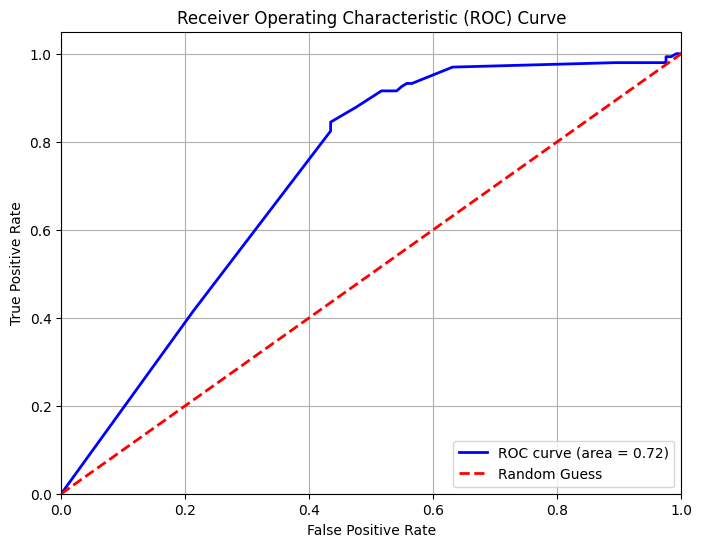

In [31]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

`BINARY CLASSIFICATION PLOT`

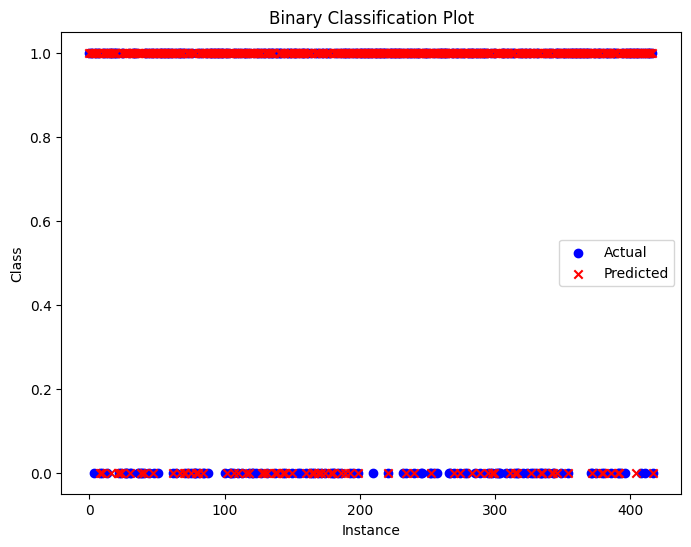

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Class')
plt.title('Binary Classification Plot')
plt.legend()
plt.show()

`FEATURE DISTRIBUTION AGAINST OBESITY`

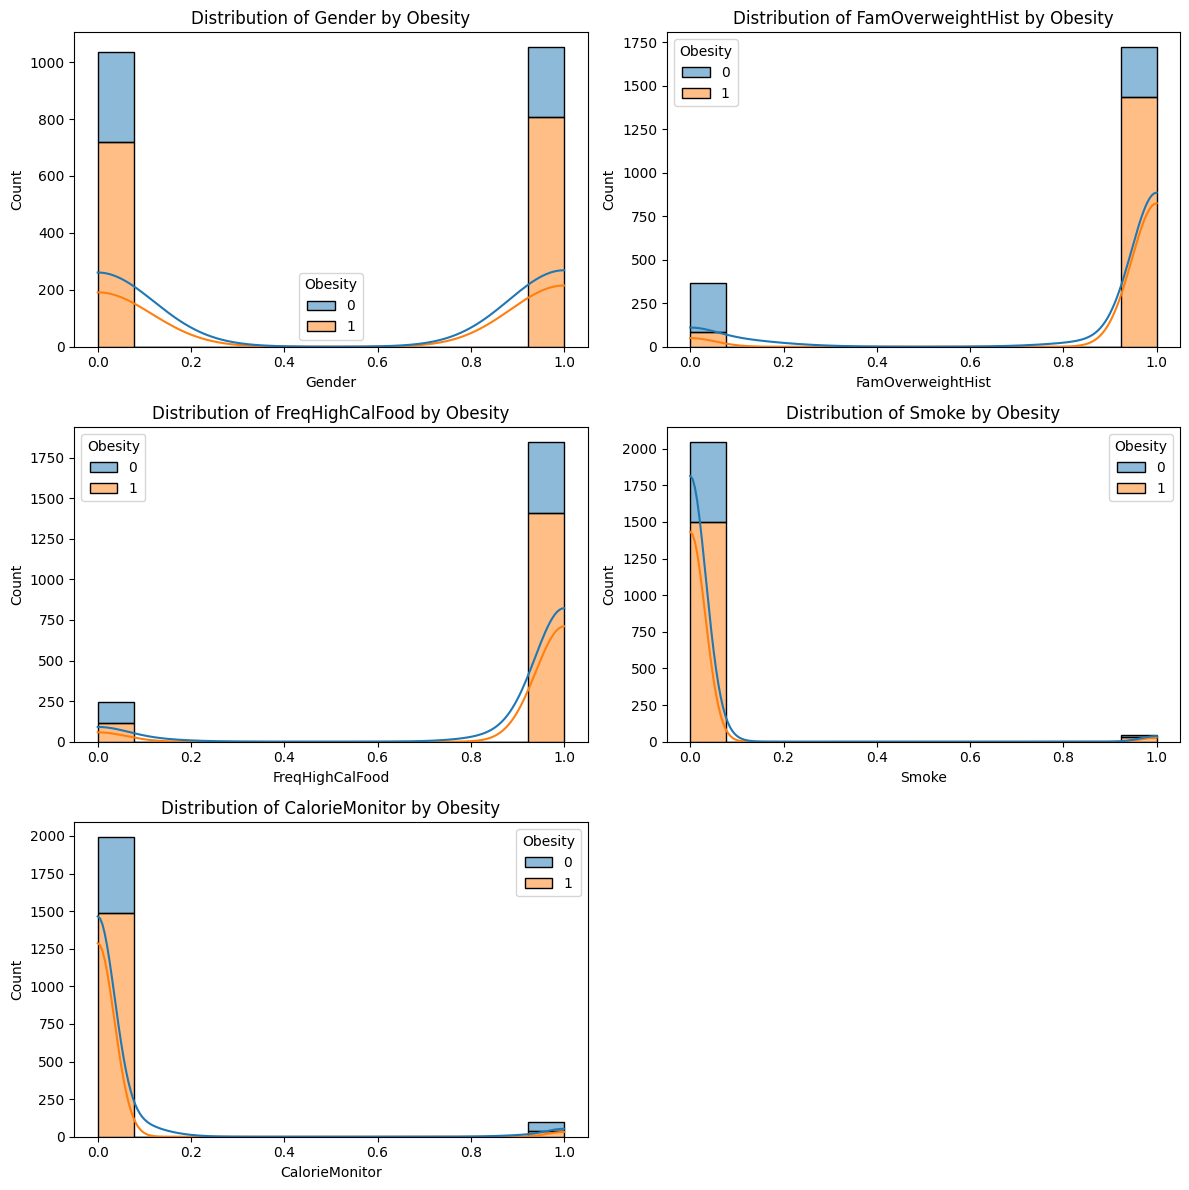

In [33]:
import math

num_features = len(binary_features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(12, num_rows * 4))  
for i, feature in enumerate(binary_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=feature, hue=target_variable, kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Obesity')

plt.tight_layout()
plt.show()


` | -------------------------------------------------------------------------- | END | ------------------------------------------------------------------------------ | `